In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Paths
u_file = '/Users/jure/PhD/coding/RICO_1hr/rico.u.nc'
v_file = '/Users/jure/PhD/coding/RICO_1hr/rico.v.nc'
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'

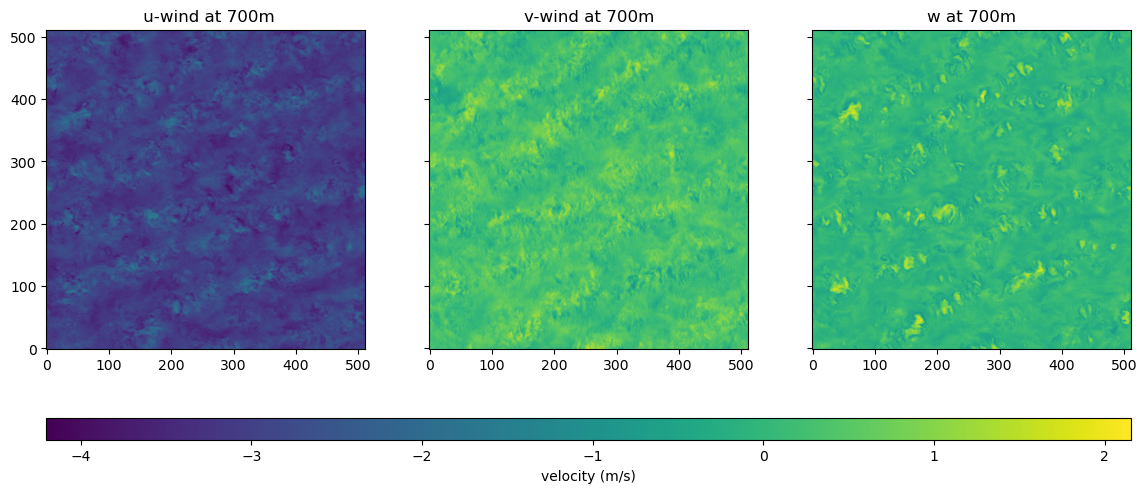

In [2]:
desired_height = 700
timestep = 10

def load_data_at_height(filename, var_name, timestep, height, vertical_dim_name):
    with nc.Dataset(filename) as ds:
        vertical_levels = ds[vertical_dim_name][:]
        idx = (np.abs(vertical_levels - height)).argmin()
        var_data = ds[var_name][timestep, idx, :, :]  # Extract 2D slice at the specified height
    return var_data

u_wind = load_data_at_height(u_file, 'u', timestep, desired_height, 'zt')
v_wind = load_data_at_height(v_file, 'v', timestep, desired_height, 'zt')
w_wind = load_data_at_height(w_file, 'w', timestep, desired_height, 'zm')

# Determine global min and max values for consistent color scaling
all_data = np.stack([u_wind, v_wind, w_wind])
vmin, vmax = all_data.min(), all_data.max()

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(14, 6), sharex=True, sharey=True)

cmap = 'viridis'
im = axs[0].imshow(u_wind, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
axs[0].set_title(f' u-wind at {desired_height}m')

axs[1].imshow(v_wind, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
axs[1].set_title(f'v-wind at {desired_height}m')

axs[2].imshow(w_wind, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
axs[2].set_title(f'w at {desired_height}m')

fig.colorbar(im, ax=axs, orientation='horizontal', aspect=50, label = 'velocity (m/s)')
plt.show()



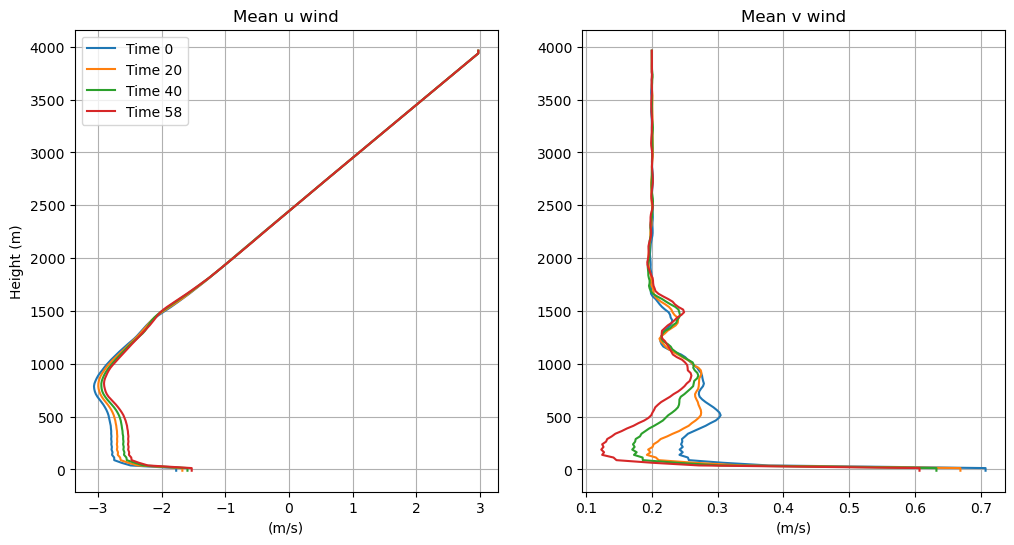

In [3]:
timesteps = [0, 20, 40, 58]

def load_wind_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        wind_data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        zt_values = ds['zt'][:]
    return wind_data, zt_values


# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Loop over timesteps
for timestep in timesteps:
    u_wind_data, zt_values = load_wind_all_levels(u_file, 'u', timestep)
    u_wind_means = np.mean(u_wind_data, axis=(1, 2))  # Mean over both horizontal dimensions
    axs[0].plot(u_wind_means, zt_values, label=f'Time {timestep}')
    
    v_wind_data, zt_values = load_wind_all_levels(v_file, 'v', timestep)
    v_wind_means = np.mean(v_wind_data, axis=(1, 2))
    axs[1].plot(v_wind_means, zt_values)

axs[0].set_xlabel('(m/s)')
axs[0].set_ylabel('Height (m)')
axs[0].set_title('Mean u wind')
axs[0].grid(True)
axs[0].legend()

axs[1].set_xlabel('(m/s)')
axs[1].set_title('Mean v wind')
axs[1].grid(True)

plt.show()


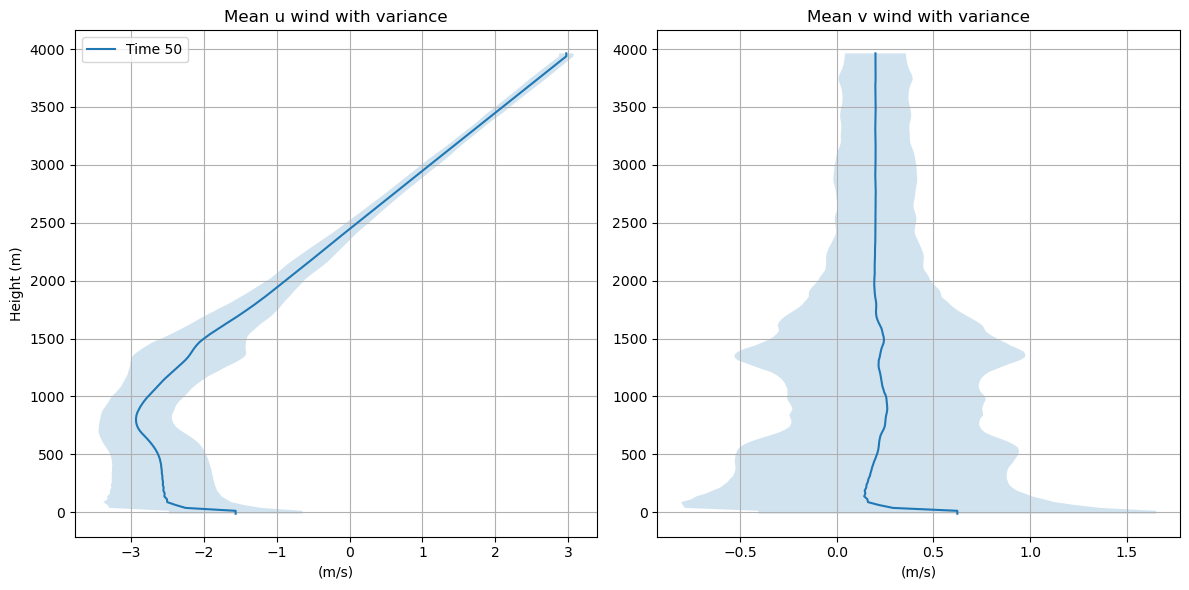

In [9]:
timestep = 50

# Sigma level: 1 for 1σ, 2 for 2σ...
sigma_level = 2

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

u_wind_data, zt_values = load_wind_all_levels(u_file, 'u', timestep)
u_wind_means = np.mean(u_wind_data, axis=(1, 2))  # Mean over both horizontal dimensions
u_wind_std = np.std(u_wind_data, axis=(1, 2))  # Standard deviation over both horizontal dimensions

v_wind_data, zt_values = load_wind_all_levels(v_file, 'v', timestep)
v_wind_means = np.mean(v_wind_data, axis=(1, 2))
v_wind_std = np.std(v_wind_data, axis=(1, 2))

axs[0].plot(u_wind_means, zt_values, label=f'Time {timestep}')
axs[0].fill_betweenx(zt_values, u_wind_means - sigma_level * u_wind_std, u_wind_means + sigma_level * u_wind_std, alpha=0.2)

axs[1].plot(v_wind_means, zt_values)
axs[1].fill_betweenx(zt_values, v_wind_means - sigma_level * v_wind_std, v_wind_means + sigma_level * v_wind_std, alpha=0.2)

axs[0].set_xlabel('(m/s)')
axs[0].set_ylabel('Height (m)')
axs[0].set_title('Mean u wind with variance')
axs[0].grid(True)
axs[0].legend()
axs[1].set_xlabel('(m/s)')
axs[1].set_title('Mean v wind with variance')
axs[1].grid(True)
plt.tight_layout()
plt.show()
